# The Rainbow Method Part III. Mathematical Foundation. 

- author: Anna Arakelyan, Dmytro Karabash
- categories: [python, data science, classification, encoding]
- image: ../images/rainbow3.jpg
- permalink: /rainbow3/
- hide: true

![rainbow](../images/rainbow3.jpg)

In this article, we justify mathematically the advantages of the Rainbow method over One-hot. We start with a simple example, and then we proceed with a full generalization and a simulation. In the final part, we discuss various assumptions and limitations of the Rainbow method and provide actionable recommendations to get the best out of Rainbow. Please note that the discussion below applies to any tree-based algorithm that relies only on the order of the values. That includes any random forest and any gradient boosting algorithm such as *xgboost*.
<br>

## How exactly does rainbow help?

### Simple Example

Consider the following example:

- assume a binary classification problem, with output variable having values 0 and 1;
- assume we have only one categorical variable V and no other variables;
- assume V has exactly four categories with values v1 < v2 < v3 < v4;  <br>
    *In the case of the nominal variable, the values simply represent numeric codes assigned to each category.*
- assume each value of V has the same or close number of samples in the data;
- assume an ideal separation will give to {v1 & v2} samples f-score = 1 and to {v3 & v4} samples f-score = 2, where f-score represents some decision function used for separation (e.g. Gini impurity, information gain, etc.). <br>
    *I.e. the data generating process would separate **between** the groups {v1 & v2} and {v3 & v4}, but would not distinguish values **within** each group*.

Let's consider two cases - Rainbow and One-hot. For Rainbow, we will use V directly to build a decision tree. For One-hot, we will need to create four binary variables - let's call them V1, V2, V3, V4, where 
Vi = 1 if V=vi and 0 otherwise.

Let's for simplicity build a single decision tree. Assume a simple algorithm that picks each next feature randomly, and compares all values of that feature to make the best split. In the case of the rainbow, samples from two categories will be sent to the left branch and samples from two other categories will be sent to the right branch of the tree. In such a situation a natural split occurs between v2 and v3, and rainbow would need one split,
<br>

Figure 1

<img align="left" src="img-anna/R1.png" />

while One-hot would need two or three splits. Here are two examples:

Figure 2

<img align="left" src="img-anna/R2.png" /> 

 Figure 3

<img align="left" src="img-anna/R3.png" />

In other words, assuming a clear order between categories, the Rainbow method is strictly better at separating samples - it makes fewer splits. In this example, it finds the single perfect split between v2 and v3. The One-hot method goes through four scales instead of one and does not naturally incorporate a combination of information from a few features.

Figure 4

<img align="left" src="img-anna/R4.png" width=300/>

But what happens if the categories do not go in perfect order? 

### Generalizing simple example

Let's look at the more general case, where the values of the categorical variable are in a different order. Below are some examples of 4 categories and their f-scores. The same f-score justifies combining values into a group. For instance, 1,1,2,2 represents our example above, where the first two categories get assigned f = 1, and the last two categories get assigned f = 2, and the split should happen in the middle.

The number of splits would depend on the order in which these categories appear.

For rainbow orders:

* 1,1,2,2 and 2,2,1,1 the number of splits would be 1; 

Figure 5

<img align="left" src="img-anna/R5.png" width=300/>

* 1,2,2,1 and 2,1,1,2 the required number of splits would be 2; 

Figure 6

<img align="left" src="img-anna/R6.png" width=300/>

* 1,2,1,2 and 2,1,2,1, the required number of splits would be 3.

Figure 7

<img align="left" src="img-anna/R7.png" width=300/>

For One-hot, the orders below would represent the order in which the One-hot features are selected and added to the tree:

* 1,1,2,2 and 2,2,1,1 the required number of splits would be 2;

As in our simple example above (Figure 2), the first split would be made on V1, the second on V2, and that would be sufficient to separate between the samples with f = 1 and f = 2.

* 1,2,2,1 and 2,1,1,2 and 1,2,1,2 and 2,1,2,1 the number of splits would be 3.

In these examples, as shown above (Figure 3), three splits would be needed given the order in which binary features enter the tree.

Note that the Rainbow and One-hot orders described here are **not the same orders**, so we cannot compare them directly. In the case of Rainbow, we look at the order at the top - in which categories appear on a single scale, while for One-hot we look at the order at the bottom - in which categories are picked by the model. Nevertheless, we see that on average Rainbow is better as it provides a lower number of splits - best case 1, average case 2, worst case 3; while One-hot gives best case 2, average case $\frac 83$, and worst case 3. In fact, this is true in general and we show it below.

## General Case: Random rainbow vs One-hot

Assume that a certain categorical variable $V$ has $K$ categories with values v1 < v2 < v3 ... < vk. Then:
- One-hot would create $K$ features $V1, V2, ..., VK$, where $Vi$ = 1 if $V$ = vi and 0 otherwise;
- Rainbow would create a single feature, where all the categories appear on one scale. We can keep the name of this variable $V$.

Assume $K$ categories optimally would need to be split into $g$ groups of size $G_1,G_2,...,G_g$. By size $G_i$ we mean a number of categories out of $K$ (not the number of samples). 

For example, in the simple example above - the order is 1,1,2,2:

Figure 8

<img align="left" src="img-anna/R8.png" width=300/>

and $K=4$, $g=2$, $G_1=2$ consisted of {v1, v2}, and $G_2=2$ consisted of {v3, v4}. 

Another example - if the order is 1,2,2,1:

Figure 9

<img align="left" src="img-anna/R9.png" width=300/>

Here $K=4$, $g=2$, $G_1=2$ consists of {v1, v4}, and $G_2=2$ consists of {v2, v3}.

Unlike the simple example of the perfect rainbow, in the general case, the $K$ categories would appear **in random order**, and our rainbow would be random. However, for the purposes of computation, we only care about the groups of the same f-values rather than about actual categories. In other words, if v1 and v2 samples produce the same f-score, it does not matter whether the order is (v1, v2) or (v2, v1).

For One-hot the order that would matter is the one in which One-hot splits are made. This order is also assumed to be random. This is the order that we would always refer to when talking about One-hot.

>In reality, the One-hot splits are not fully random and the order of them being picked by the model varies depending on the number of samples in each category, subsamples of columns chosen, and other hyperparameters. That can be both in favor and against the case for One-Hot. We will come back to this assumption later in the article (see Randomness Assumption), and for now, will proceed with assuming randomness for simplicity.

While the orders that matter for Rainbow and One-hot are not the same, it helps to couple them to make comparisons. Let's compute the required number of splits in best, average, and worst cases.

### Main Comparison Metric

As in the simple example above, in this general case of random rainbow vs One-hot, we will compare the number of splits made by the model to approximate the data generating process. Why is it our main metric? Less splits means:
- less time;
- less computational resources;
- simpler model;
- less overfit;
- more effective model.

### Best case 

#### One-hot
In the best-case scenario for One-hot, the biggest group won't be split.

For example, in the case of 1,1,2,2,2,3,3 we would like the biggest group 2,2,2 to end up on the bottom of the tree, and thus, not introduce any extra splits.

Figure 10

<img  align="left" src="img-anna/R10.png"/>

Thus, in the best case, One-hot would require $K - G_{max}$ splits, where $G_{max} = max_i G_i$ is the maximum of $G_i$. This best-case $K - G_{max}$ is obtained when each group except the largest one gets one split per category and the remaining largest group has the same answer so doesn't require any additional splits.  To prove that one cannot do better, observe that if a few categories do not appear on any tree node, i.e. no splits are made, then they are "combined" - there is no way to distinguish the values in these two categories.

#### Rainbow

In the best case of a rainbow - the values are in perfect order, and the minimum splits are needed. Given $g$ groups, that would require $g-1$ splits. This happens when groups are together and it simply splits at $g-1$ points to separate $g$ groups.

For example, clearly, two splits are needed for the perfect rainbow with three groups 1,1,2,2,2,3,3.

One cannot do better since if there is no split between two groups there is no way to distinguish them.

#### Comparison

Clearly  $$K - G_{max}=(\sum_{i=1}^g G_i)-G_{max}=(\sum_{i!=max}G_i) \geq (\sum_{i!=max} 1) = g-1$$ and hence best rainbow is better than the best One-hot.

### Average Case

#### One-hot

From the logic presented in the best case, it follows that
> The number of splits that One-hot needs would be $N$ - the number of categories that are chosen before the remaining ones are in one group.

Figure 10 shows the best case - where all the remaining ones belong to the largest group. In the average case, the remaining group can be any group or any group's part. We cannot expect that a homogenous group won't be broken into pieces when building an average tree. What we care about is that the tree building should end when reaching some homogenous group.

In the best case $N = K - G_{max}$. In the average case $N = K - R$ where $R$ is the size of the remaining group. 

For example, if the order in which One-hot categories are chosen for the tree is 1,1,2,2,3,3,2,2,2 then $R=3$ since the last group 2,2,2 is of size 3. The number of categories $K=9$, thus the number of splits would be $K-R=6$.

It is easiest to compute the expected value of $N$ by using less common formula $\mathbb E[X] = \sum_{j} \mathbb P[X \geq j]$ applied to $R$. We then utilize the formula of hypergeometric distribution to calculate each probability and achieve the result below.

\begin{align}
\mathbb E[N] &= \mathbb E[K-R] = K- \mathbb E[R] = K - \sum_{j=1}^{K} \mathbb P[R \geq j] =K- \sum_{j=1}^K \frac{\sum_i \frac{G_i!}{(G_i-j)!}} {\frac{K!}{(K-j)!}} = (K-1) - \sum_{j=2}^K \frac{\sum_i \frac{G_i!}{(G_i-j)!}} {\frac{K!}{(K-j)!}}\\
\end{align}

#### Rainbow 

From the best case logic, it also follows that
> The number of splits that random Rainbow needs would always be $D$ - the number of consecutive pairs in rainbow order that are in distinct groups.

In the best case $D=g-1$. 

For example, in the case of Rainbow order 1,1,2,2,3,3,2,2,2 the splits will happen in 3 places, and these are the only places where the group is changed and the values in consecutive pairs belong to distinct groups.

Let's calculate the expected value of $D$. We do this by calculating for $K-1$ consecutive pairs as potential places for splitting the probability that the f-score is different. It is easier to subtract from one the probabilities that f values in each consecutive pair are the same. We sum through all possible groups $i$ to compute the likelihood that two consecutive values belong to one group.

\begin{align}
\mathbb E[D] &= (K - 1) \cdot (1-\frac{ \sum_i G_i \cdot (G_i-1)} {K(K-1)}) \notag \\
             &= (K-1)-\frac{ \sum G_i \cdot (G_i-1)} {K} \notag
\end{align}

#### Comparison

An easy way to see that $\mathbb E[D]$ is larger than $\mathbb E[N]$ is the stochastic coupling since both $N$ and $D$ can be obtained as starting from $K-1$ and subtracting $1$ for each consecutive pair in the same group; except in case of $N$, all these pairs have to be in the string at the end.  Due to this restriction $N$ is always larger.

### Worst Case 

#### One-hot

In the worst case for One-hot, the number of splits is $K-1$ when one goes through all but one category to get to one group remaining.

#### Rainbow

In this case, the number of needed splits is <br><br>
$\min( (K - 1), 2 \cdot (K-G_{max}))$
<br><br>as we can only get up to two splits per each category that is not in the largest group. 

Indeed, if there are no consecutive pairs of values that belong to the same group then the number of splits would be $K-1$, for example here 3,2,1,3,1,2.

At the same time, if there is a prevalent group and some minority groups, for example, 1,1,1,2,1,1,3,1,1, the number of splits will equal to the number of minority groups - $K-G_{max}=2$ in this case (2 and 3) times 2 which is the maximum number of splits that each minority group introduces - one to the left and one to the right.

Thus the needed number of splits will be the minimum between the two cases above.

#### Comparison

Clearly, the number of splits for Rainbow is less than or equal to that of One-hot for the worst case as well.

## Simulation

We have shown above that *theoretically* in a general case Rainbow method outperforms One-hot in best, average, and worst-case scenarios. 
Let's look at the *empirical* simulation: we applied the formulas for best, average, and worst-case number of splits for Rainbow and One-hot to compare the distribution of splits for some examples of the data generating processes.

In [10]:
#hide

import pandas as pd
from collections import Counter
import numpy as np

s='12,112,1112,1122,11112,11122,111222,11123,11223,112233,11223344,111222333,1111122233,1111111122,1111111123'
#s+=','+('1'*10+'2'*10)+','+('1'*20+'2'*20)
cc=examples=s.split(',')
examples=[list(i) for i in examples]

# number of splits in each scenario
o_best = [len(e)-max(Counter(e).values()) for e in examples]
r_best = [len(Counter(e))-1 for e in examples]
o_worst = [len(e)-1 for e in examples]
r_worst = [min(len(e)-1,2*(len(e)-max(Counter(e).values()))) 
           for e in examples]

o_ave = []
r_ave = []
n_samples = 40000
# to have two precision digits
for e in examples:
    # o_sum and r_sum is the sum of number of splits over all samples
    # we want to get avg n of splits given various scenarios (avg over samples)
    o_sum = r_sum = 0
    for i in range(n_samples):
        p = np.random.permutation(e) 
        #[::-1] omiting as same thing but to indicate we count from end for one-hot order
        o_res = r_res = len(e)-1
        for i in range(len(p)-1):
            if p[i]==p[i+1]:
                r_res -=1
        for i in range(len(p)-1):
            if p[i]==p[i+1]:
                o_res -=1
            else:
                break
        o_sum += o_res
        r_sum += r_res
    o_ave += [o_sum/n_samples]
    r_ave += [r_sum/n_samples]

ii = 'o_best,r_best,o_ave,r_ave,o_worst,r_worst'.replace('o_','One-hot ').replace('r_','Rainbow ')
ii = ii.replace('ave','Average').replace('best','Best').replace('worst','Worst')
ii = ii.split(',')
ii = [i+' Case' for i in ii]
rainbow_vs_onehot=pd.DataFrame([o_best,r_best,o_ave,r_ave,o_worst,r_worst],
                                   columns=cc,index=ii).round(2)
rainbow_vs_onehot=rainbow_vs_onehot.iloc[[4,5,2,3,0,1]]
rainbow_vs_onehot

,12,112,1112,1122,11112,11122,111222,11123,11223,112233,11223344,111222333,1111122233,1111111122,1111111123
One-hot Worst Case,1.0,2.00,3.00,3.00,4.00,4.0,5.00,4.0,4.0,5.0,7.00,8.00,9.00,9.00,9.00
Rainbow Worst Case,1.0,2.00,2.00,3.00,2.00,4.0,5.00,4.0,4.0,5.0,7.00,8.00,9.00,4.00,4.00
One-hot Average Case,1.0,1.67,2.24,2.67,2.79,3.5,4.50,3.6,3.8,4.8,6.85,7.71,8.57,7.12,7.14
Rainbow Average Case,1.0,1.33,1.49,2.00,1.60,2.4,3.01,2.8,3.2,4.0,6.00,5.99,6.20,3.19,3.40
One-hot Best Case,1.0,1.00,1.00,2.00,1.00,2.0,3.00,2.0,3.0,4.0,6.00,6.00,5.00,2.00,2.00
Rainbow Best Case,1.0,1.00,1.00,1.00,1.00,1.0,1.00,2.0,2.0,2.0,3.00,2.00,2.00,1.00,2.00


Figure 11

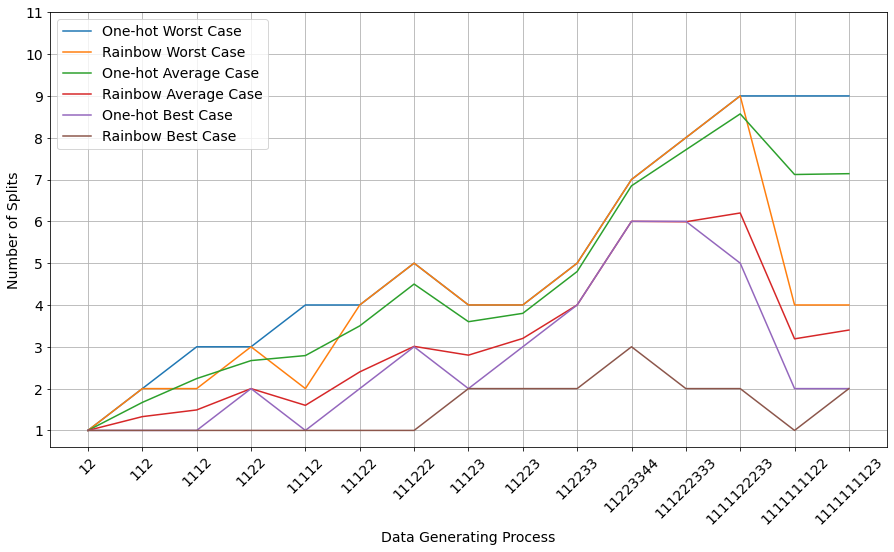

In [11]:
#hide_input
rainbow_vs_onehot.T.plot(rot=45,figsize=(15,8))
plt.xticks(ticks = range(15),labels=cc, fontsize=14)
plt.xlabel('Data Generating Process', fontsize=14)
plt.yticks([1,2,3,4,5,6,7,8,9,10,11], fontsize=14)
plt.ylabel('Number of Splits', fontsize=14)
plt.grid()
plt.legend(loc=2, prop={'size': 14})
plt.show()

One can clearly see that the simulation confirms our theoretical finding: 
- Best Rainbow always needs a less or equal number of splits than Best One-hot: the brown line is almost always below the purple line;
- Average Rainbow always outperforms Average One-hot: the red line is always strictly below the green line;
- Worst Rainbow needs the same or a lower number of splits than worst One-hot: the orange line is either below or coincides with the blue line.

## Conclusion

### Discussion of Assumptions

While the results above appear to be very optimistic, we should discuss the method limitations and assumptions we made.

> Single Tree Assumption: The use of a single decision tree vs forest.

That assumption does not really impact the outcomes, since a single tree is equivalent to a forest of trees with depth 1. In fact, if our method works on simpler models that only adds to its advantages.

> Randomness Assumption: One-hot picks columns randomly.

We assumed above that our machine learning algorithms pick features somewhat randomly, and then make a split by using full scales of values of those features. One might argue that in reality, before making any split, algorithms such as *xgboost* would look at many splits **across all features** and will pick the best.
<br> <br>
We understand that this is a strong assumption and in reality, the One-hot splits are not fully random. However, they are also not fully deterministic. First, most of the algorithms don't run all possible comparisons within all features to make a choice about the node, rather some quick set of rough comparisons, which is done to avoid overfitting. Second, various hyperparameters have a substantial effect on which split will be chosen: subsample of columns, subsample of rows, maximum depth, etc. Third, if we are talking about bigger categorical variables with many categories - One-hot creates a lot of features, and randomness assumption would be not far from the truth. Finally, counts of samples for each category can be highly uneven, and that also gets us closer to randomness and is likely to yield worse results for One-hot than for Rainbow.

### How to find the best Rainbow?

As we have shown above the distribution of the number of splits is strictly better for Rainbow vs One-hot. However, one might argue that in reality we might be choosing between a *good* One-hot (assuming intelligent algorithms and relaxing randomness assumption) and a *random* rainbow. <br>
In fact, the quality of a rainbow is an unknown. We can see that the Average Rainbow (red line) is between Best One-hot (purple line) and Average One-hot (green line). So it is important to try and find a good order rainbow, that approaches the data generating process.
<br><br>
The proposed solution here is very simple and clear - pick a few, choose the best. We invite you to try a few possible Rainbow encodings and compare them side by side to each other and One-hot. Your data and problem context will be the best tools here to choose the best encoding. We also recommend you to look at a few metrics, as well as model runtime. We expect that the Rainbow method would provide you with much better overall results, especially if you have many categorical variables with many values.

### Final Notes

This article just opens the conversation about the Rainbow method, and by no means exhausts the topic. In potential future investigations, we could explore some other aspects. To name a few: continuous target variables; comparison with other dimensionality reduction methods, such as PCA; missing values and how they fit the Rainbow framework; limitations and implications of combining seemingly unrelated features into a single Rainbow. We hope to open the gate for further questions and feedback on this method.

#### References

While the topic of One-hot and binary-One-hot encoding has been touched by many authors:

* https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159
* https://towardsdatascience.com/stop-One-hot-encoding-your-categorical-variables-bbb0fba89809

the approach presented here is rarely used in industry or academia, while has shown superior results and by definition creates fewer features.